<a href="https://colab.research.google.com/github/BHANU344/AIML/blob/main/AIML_as10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
power_com = fetch_ucirepo(id=235)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
X = power_com.data.features
y = power_com.data.targets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
print(f"Top 5 Elecricity Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=False).head()}")


Top 5 Elecricity Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1961817  9/9/2010  02:21:00               0.238                 0.052   
1962837  9/9/2010  19:21:00               0.390                 0.132   
1962857  9/9/2010  19:41:00               2.938                 0.436   
1962856  9/9/2010  19:40:00               2.898                 0.416   
1962855  9/9/2010  19:39:00               2.886                 0.398   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1961817  239.790            1.000          0.000          1.000   
1962837  243.580            1.600          0.000          0.000   
1962857  241.510           12.200          0.000         38.000   
1962856  241.090           12.000          0.000         38.000   
1962855  241.070           12.000          0.000         38.000   

         Sub_metering_3  
1961817             1.0  
1962837             1.0  
1962857             1.0  
1962856        

In [7]:
print(f"Top 5 Voltage Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=True).tail()}")


Top 5 Voltage Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1962153  9/9/2010  07:57:00               1.430                 0.080   
1962152  9/9/2010  07:56:00               1.428                 0.076   
1962151  9/9/2010  07:55:00               1.392                 0.000   
1962149  9/9/2010  07:53:00               1.392                 0.000   
1961677  9/9/2010  00:01:00               0.808                 0.116   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1962153  239.200            6.000          0.000          1.000   
1962152  238.390            6.000          0.000          1.000   
1962151  238.050            5.800          0.000          0.000   
1962149  238.610            5.800          0.000          0.000   
1961677  246.140            3.400          0.000          0.000   

         Sub_metering_3  
1962153            18.0  
1962152            18.0  
1962151            18.0  
1962149           

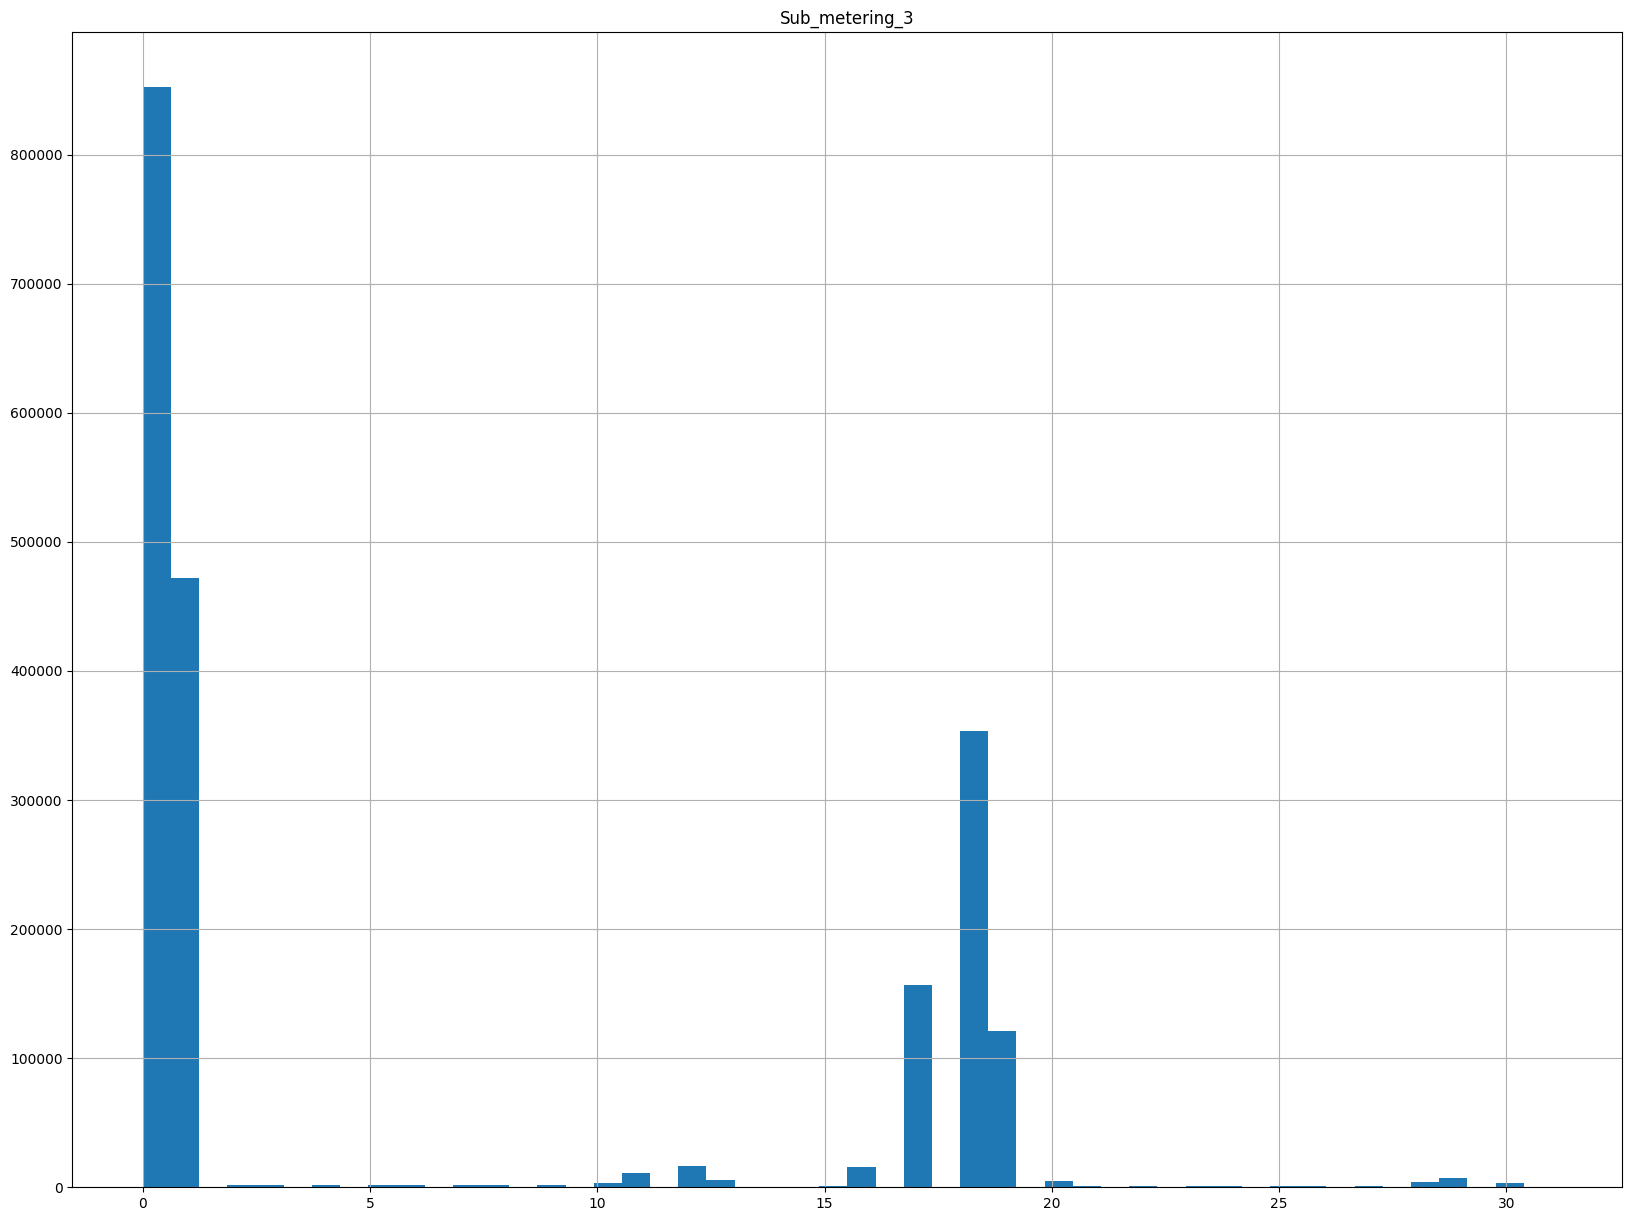

In [8]:
power_com_df = pd.DataFrame(power_com.data.features)
power_com_df.hist(bins=50, figsize=(20,15))
plt.show()



In [9]:
power_com_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
mport sklearn
from sklearn.model_selection import train_test_split

X = power_com_df.drop(['Date','Time'], axis=1)
y = power_com_df.Voltage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

SyntaxError: invalid syntax (<ipython-input-10-960ea40505f2>, line 1)

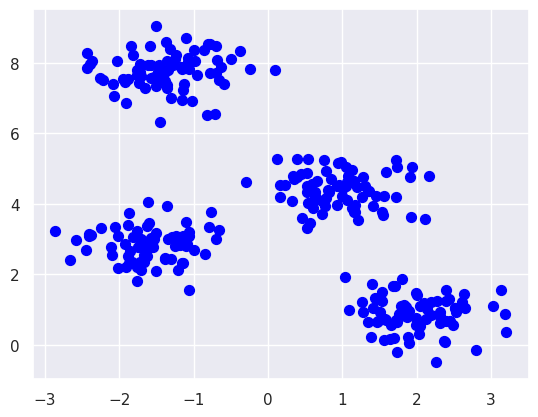

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                         cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50,color='blue');

In [12]:
X.shape

(300, 2)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, y_true)



0.25

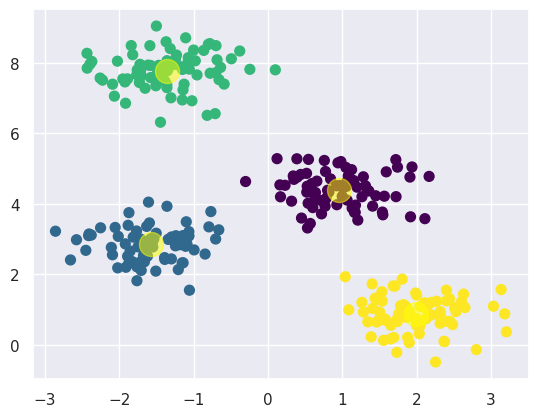

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, \
            cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], \
                        c='yellow', s=300, alpha=0.5);

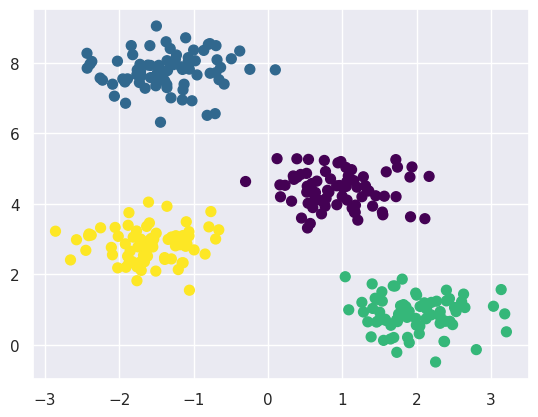

In [15]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    labels = pairwise_distances_argmin(X, centers)
    new_centers = np.array([X[labels == i].mean(0)for i in range(n_clusters)])

    if np.all(centers == new_centers):
        break
    centers = new_centers

  return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
                 s=50, cmap='viridis');

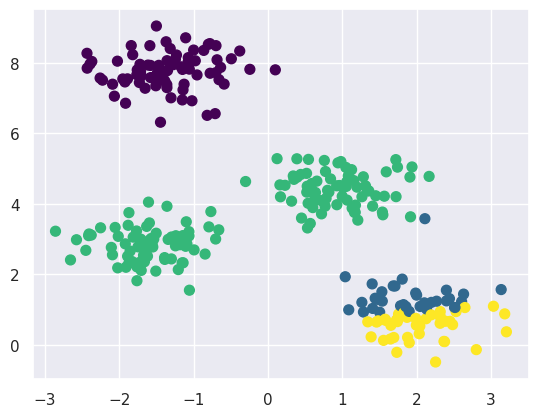

In [16]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


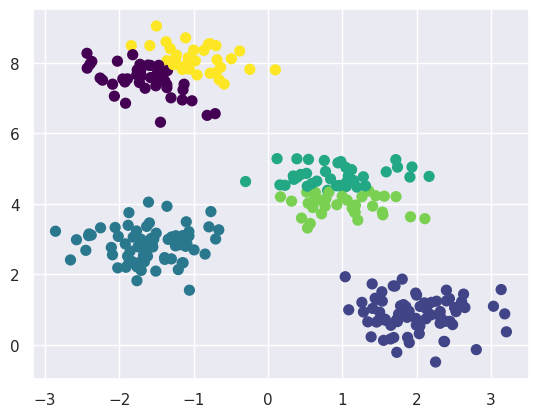

In [17]:
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');



In [18]:
accuracy_score(labels, y_true)


0.5

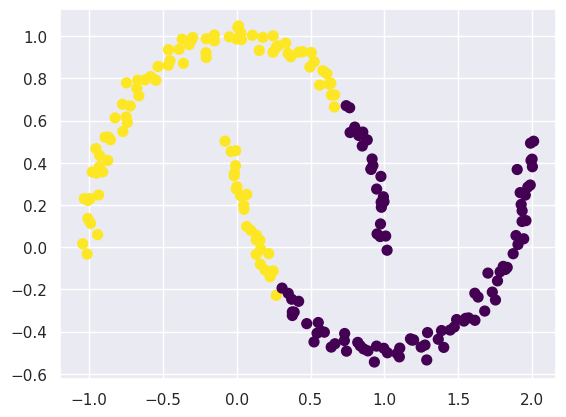

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.03, random_state=0)
labels = KMeans(2, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
